# Assignment - Data Cleaning 2

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

SQLAlchemy is a popular Python library that's used for accessing databases and querying them.

I may no longer need the below cell because I have the dataset, but I'll keep it for reference

In [2]:
# postgres_user = 'dsbc_student'
# postgres_pw = '7*.8G9QH21'
# postgres_host = '142.93.121.174'
# postgres_port = '5432'
# postgres_db = 'useducation'

# engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
#     postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# US_EDU = pd.read_sql_query('select * from U.S. Education Dataset',con=engine)

# # no need for an open connection, 
# # as we're only doing a single query
# engine.dispose()

In [3]:
PATH = r'C:\Users\latee\Downloads\states_all.csv'
US_EDU = pd.read_csv(PATH)

## Assignment - Data Cleaning 2.1

Determine all the variable types and find the fraction of the missing values for each variable.

In [4]:
US_EDU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
US_EDU.isnull().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [6]:
for columns in US_EDU:
    print(columns, US_EDU[columns].isnull().sum()/len(US_EDU[columns]))

PRIMARY_KEY 0.0
STATE 0.0
YEAR 0.0
ENROLL 0.17627345844504022
TOTAL_REVENUE 0.14209115281501342
FEDERAL_REVENUE 0.14209115281501342
STATE_REVENUE 0.14209115281501342
LOCAL_REVENUE 0.14209115281501342
TOTAL_EXPENDITURE 0.14209115281501342
INSTRUCTION_EXPENDITURE 0.14209115281501342
SUPPORT_SERVICES_EXPENDITURE 0.14209115281501342
OTHER_EXPENDITURE 0.17627345844504022
CAPITAL_OUTLAY_EXPENDITURE 0.14209115281501342
GRADES_PK_G 0.11595174262734584
GRADES_KG_G 0.08847184986595175
GRADES_4_G 0.08780160857908847
GRADES_8_G 0.08780160857908847
GRADES_12_G 0.08780160857908847
GRADES_1_8_G 0.08780160857908847
GRADES_9_12_G 0.08780160857908847
GRADES_ALL_G 0.11595174262734584
AVG_MATH_4_SCORE 0.6407506702412868
AVG_MATH_8_SCORE 0.6434316353887399
AVG_READING_4_SCORE 0.6427613941018767
AVG_READING_8_SCORE 0.6662198391420912


## Assignment - Data Cleaning 2.2

Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

The last four columns have less than 50% of filled in values. Dropping them makes a lot sense here. Filling in the other missing values with the mean make sense with all other numeric variables. 

In [7]:
US_EDU = US_EDU.drop(['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'], axis=1)
US_EDU.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0


In [8]:
US_EDU2 = US_EDU.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]



for col in fill_list:
    US_EDU2.loc[:, col] = US_EDU2.loc[:, col].fillna(US_EDU2.loc[:, col].mean())

## Assignment - Data Cleaning 2.3

Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.


In [9]:
US_EDU2['YEAR'].unique()

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017], dtype=int64)

In [10]:
# using the unique array to narrow the scope of the variable being changed into 
# the scope of the column YEAR and setting the fillna to the mean values that correspond with that year

US_EDU3 = US_EDU.copy()

years = US_EDU3["YEAR"].unique()

for col in fill_list:
    for year in years:
        US_EDU3.loc[US_EDU3["YEAR"] == year, col] = US_EDU3.loc[US_EDU3["YEAR"] == year, col].fillna(
            US_EDU3[US_EDU3["YEAR"] == year][col].mean())

## Assignment - Data Cleaning 2.4


This time, fill in the missing values using interpolation (extrapolation).
Note that, by default, interpolation works only works in a forward fashion. So, for example, in the column ENROLL, which has a NaN for its first value, will still have a NaN. To solve this issue, you need to add the argument limit_direction='both'

In [11]:
US_EDU4 = US_EDU.copy()

for col in fill_list:
    US_EDU4.loc[:, col] = US_EDU4.loc[:, col].interpolate(limit_direction='both')

## Assignment - Data Cleaning 2.5

Compare your results for the 2nd, 3rd, and 4th questions. Describe differences.

In [15]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print("original", "overall", "year-by-year", "interpolation")
    print(pd.concat([US_EDU[col], US_EDU2[col],
                     US_EDU3[col], US_EDU4[col]], axis=1).describe())

Statistics for columns: ENROLL
original overall year-by-year interpolation
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.492000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  7.927807e+05
std    1.065280e+06  9.667725e+05  1.003532e+06  1.008277e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  1.328788e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  5.104480e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  9.211780e+05
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
original overall year-by-year interpolation
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   8.090707e+06
std     1.174519e+07   1.087818e+07   1.110204e+07   1.115317e+07
min     4.656500e+05 

       GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G  GRADES_1_8_G
count  1.361000e+03  1.492000e+03  1.390000e+03  1.492000e+03
mean   5.192140e+05  5.192140e+05  5.196200e+05  4.763128e+05
std    6.436384e+05  6.147133e+05  6.368932e+05  6.301837e+05
min    4.878000e+03  4.878000e+03  4.878000e+03  4.878000e+03
25%    1.106260e+05  1.211522e+05  1.129712e+05  7.884750e+04
50%    3.457750e+05  4.015865e+05  3.611705e+05  3.041060e+05
75%    6.119050e+05  5.749118e+05  6.052242e+05  5.749118e+05
max    3.929869e+06  3.929869e+06  3.929869e+06  3.929869e+06
Statistics for columns: GRADES_9_12_G
original overall year-by-year interpolation
       GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G  GRADES_9_12_G
count   1.361000e+03   1.492000e+03   1.390000e+03   1.492000e+03
mean    2.470714e+05   2.470714e+05   2.474932e+05   2.265455e+05
std     3.077056e+05   2.938773e+05   3.044943e+05   3.012735e+05
min     1.808000e+03   1.808000e+03   1.808000e+03   1.808000e+03
25%     5.147100e+04   5.91975

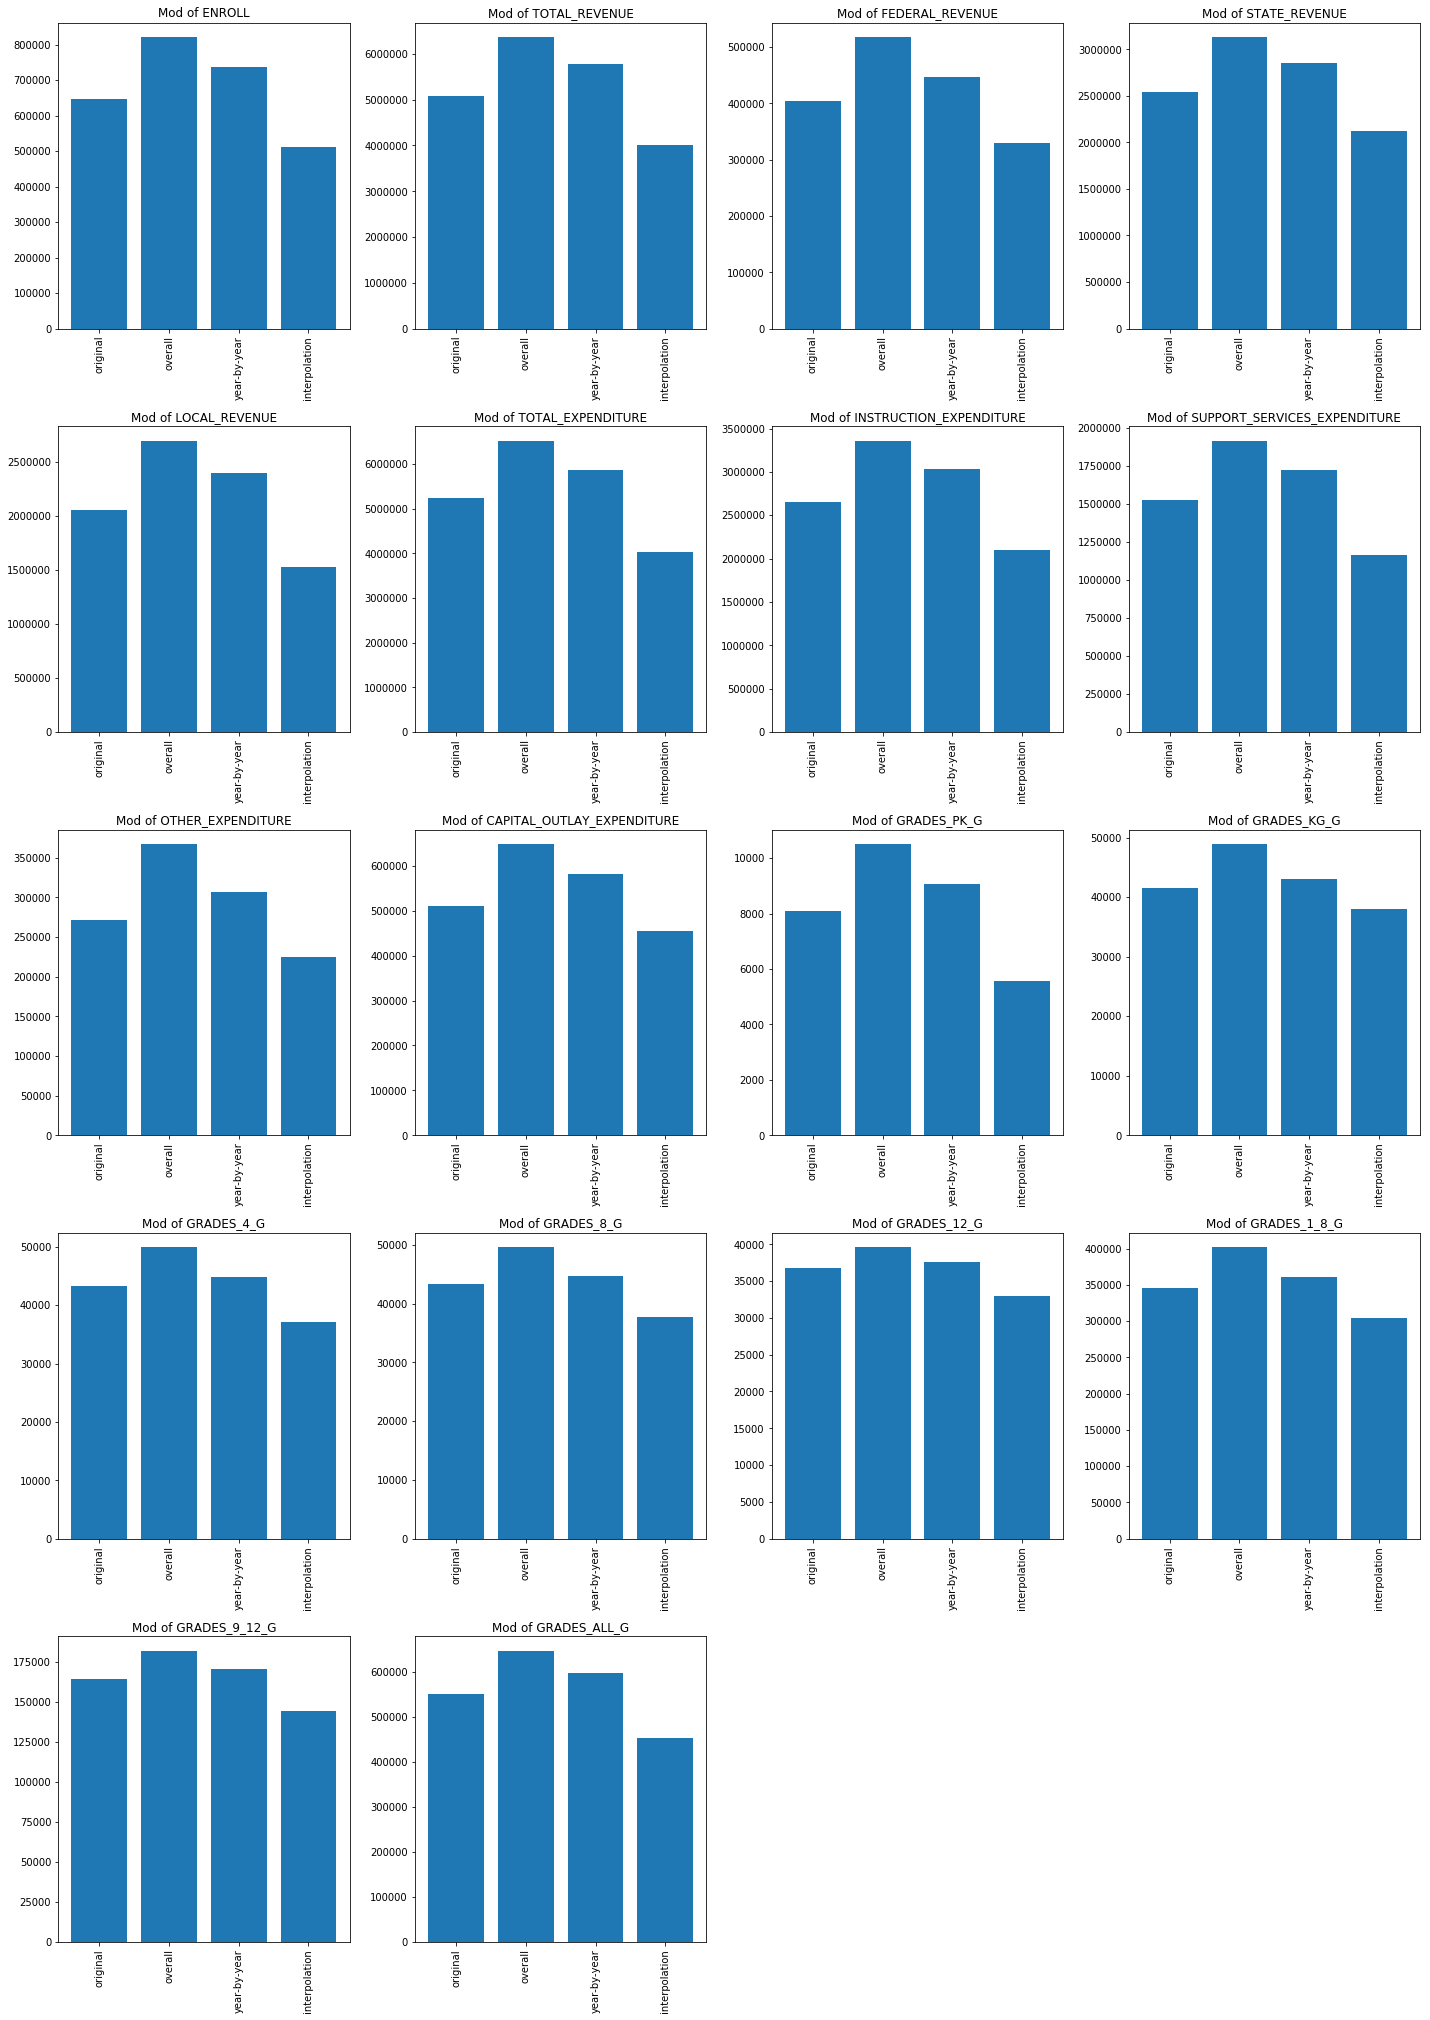

In [18]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([US_EDU[col], US_EDU2[col],
                     US_EDU3[col], US_EDU4[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()

Interpolation produced lower mean scores in every category. Overall produces the highist mean results, and year by year is the closest to the original dataset and between overall and interpolation. 